# Simple Linear Regression

## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data_Sus.csv')

x=dataset.iloc[ : ,-1].values
x=x.reshape(-1, 1) 
y=dataset.iloc[ :,-0].values 




In [ ]:
print(x)

[[728865]
 [295627]
 [216163]
 ...
 [987246]
 [377394]
 [181225]]


In [ ]:
print(y)

[1302  448  361 ... 1303  830  299]


## Dados vazios:

In [ ]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')



imputer.fit(x)



#Agora precisamos dar o intervalo que queremos tirar o critério de sunbstituição, no caso, a média:
x = imputer.transform(x)


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0) 
#fixando sem aleatoriadade para propósitos de apresentação


## Training the Simple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression #classe
regressor= LinearRegression() 
regressor.fit(x_train,y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x.reshape(-1, 1)

array([[1.30200e+03],
       [5.87660e+05],
       [1.41205e+05],
       ...,
       [6.06100e+02],
       [6.56000e+02],
       [1.00000e+01]])

## Predicting the Test set results

In [ ]:
prev_y= regressor.predict(x_test)

In [ ]:
print(x)

[[1302.]
 [ 448.]
 [ 361.]
 ...
 [1303.]
 [ 830.]
 [ 299.]]


In [ ]:
print(y)

[728865 295627 216163 ... 987246 377394 181225]


## Visualising the Training set results

<function matplotlib.pyplot.show>

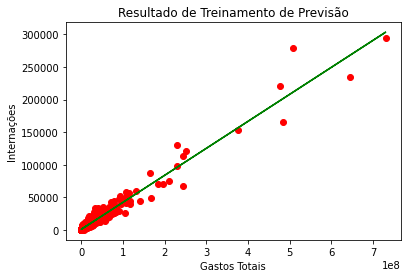

In [ ]:
#prieiro vamos visualizar os resultados do treinamento, e para tal,
#veremos a previsão que o código faz no treino:
plt.scatter(x_train,y_train,color='red') #armazenar coordenadas dos pontos de treinamento do gráfico
# agora que criamos o que tem no treino, vamos comparar com a previsão qe ele cria no treino:
plt.plot(x_train, regressor.predict(x_train),color='green')#representa a previsão de y
plt.title('Resultado de Treinamento de Previsão')
plt.xlabel('Gastos Totais')
plt.ylabel('Internações')
plt.show

## Visualising the Test set results

<function matplotlib.pyplot.show>

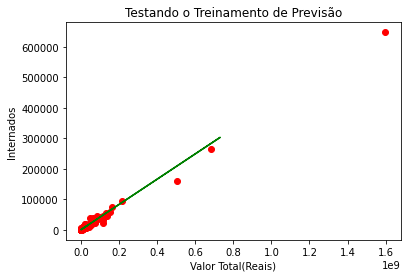

In [ ]:
#agora vamos visuaizar essa mesma previsão do treino, apicada aos dados de teste:
plt.scatter(x_test,y_test,color='red') 
#comparação:
plt.plot(x_train, regressor.predict(x_train),color='green')#representa a previsão de y

plt.title('Testando o Treinamento de Previsão')
plt.xlabel('Valor Total(Reais)')
plt.ylabel('Internados')
plt.show


# Bônus: prever um caso específico (usando a fórmula) e obter a fórmula

Obtendo a fórmula:

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)
#Nosso resultado

[0.00041445]
818.6853751395001


Obtendo uma previsão individual:

In [ ]:
print(regressor.predict([[1000000000]]))
# no formato [[x]] temos um array 2D, que é o formato nesse caso.


[415266.25616581]


#Performance